In [1]:
from pathlib import Path

import requests
from tqdm import tqdm

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import altair as alt

In [2]:
sns.set_style('white')

alt.themes.enable('default')
alt.renderers.enable('kaggle')
alt.renderers.set_embed_options(actions=False)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
cd E:\Airbnb

E:\Airbnb


In [4]:
listings_df = pd.read_csv('listings_summary.csv',
                          parse_dates=['last_review'])
listings_detail_df = pd.read_csv('listings.csv', low_memory=False,
                                 parse_dates=['host_since', 
                                              'last_scraped', 'calendar_last_scraped',
                                              'first_review', 'last_review'])

reviews_df = pd.read_csv('reviews_summary.csv', parse_dates=['date'])
reviews_detail_df = pd.read_csv('reviews.csv', parse_dates=['date'])

calendar_df = pd.read_csv('calendar.csv', parse_dates=['date'])

neighbourhoods_df = pd.read_csv('neighbourhoods.csv')
gdf = gpd.read_file('neighbourhoods.geojson')

In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 16 columns):
id                                76534 non-null int64
name                              76510 non-null object
host_id                           76534 non-null int64
host_name                         76488 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     76534 non-null object
latitude                          76534 non-null float64
longitude                         76534 non-null float64
room_type                         76534 non-null object
price                             76534 non-null int64
minimum_nights                    76534 non-null int64
number_of_reviews                 76534 non-null int64
last_review                       54340 non-null datetime64[ns]
reviews_per_month                 54340 non-null float64
calculated_host_listings_count    76534 non-null int64
availability_365                  76534 non-null 

In [6]:
listings_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Columns: 106 entries, id to reviews_per_month
dtypes: datetime64[ns](5), float64(23), int64(21), object(57)
memory usage: 68.8+ MB


In [7]:
print(listings_detail_df.columns.tolist())


['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [8]:
calendar_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27935194 entries, 0 to 27935193
Data columns (total 7 columns):
listing_id        27935194 non-null int64
date              27935194 non-null datetime64[ns]
available         27935194 non-null object
price             27934681 non-null object
adjusted_price    27934681 non-null object
minimum_nights    27932762 non-null float64
maximum_nights    27932762 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.5+ GB


In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163886 entries, 0 to 1163885
Data columns (total 2 columns):
listing_id    1163886 non-null int64
date          1163886 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.8 MB


In [10]:
reviews_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163886 entries, 0 to 1163885
Data columns (total 6 columns):
listing_id       1163886 non-null int64
id               1163886 non-null int64
date             1163886 non-null datetime64[ns]
reviewer_id      1163886 non-null int64
reviewer_name    1163885 non-null object
comments         1163374 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 53.3+ MB


In [11]:
neighbourhoods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
neighbourhood_group    0 non-null float64
neighbourhood          33 non-null object
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


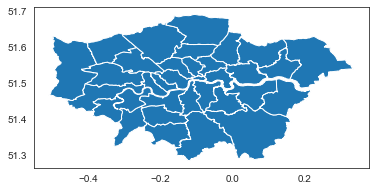

In [12]:
gdf.plot();

In [13]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.16,2,365
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,270
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaT,NaN,2,364
4,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.57224,-0.20906,Private room,29,10,129,2020-03-15,0.98,3,43


In [14]:
print(listings_df.shape)
listings_df.loc[:, listings_df.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(76534, 16)


neighbourhood_group    76534
reviews_per_month      22194
last_review            22194
host_name                 46
name                      24
dtype: int64

In [15]:
listings_df.loc[:, listings_df.nunique() <= 1].nunique().sort_values()

neighbourhood_group    0
dtype: int64

In [16]:
listings_df.describe(include='datetime')


,last_review
count,54340
unique,2285
top,2020-01-02 00:00:00
freq,610
first,2011-07-02 00:00:00
last,2021-02-13 00:00:00


In [17]:
listings_df.describe(include=['object'])


,name,host_name,neighbourhood,room_type
count,76510,76488,76534,76534
unique,74359,14244,33,4
top,Double room,Veeve,Westminster,Entire home/apt
freq,41,1155,8507,41633


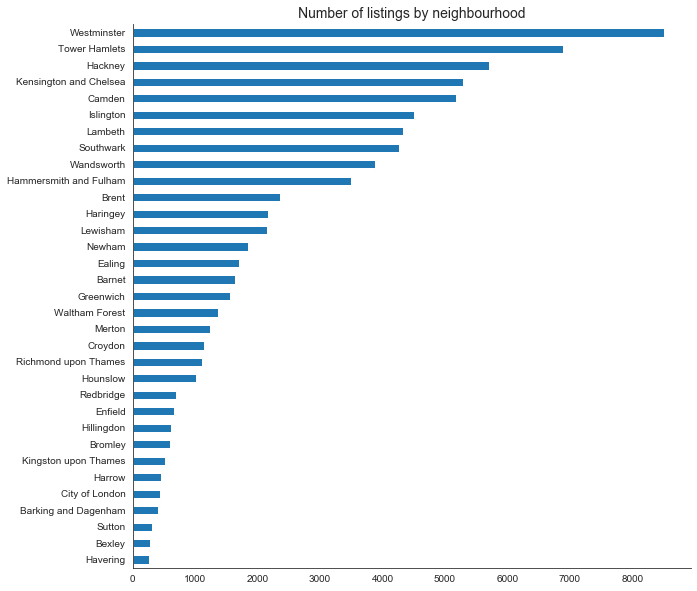

In [18]:
listings_df['neighbourhood'].value_counts().sort_values().plot.barh(figsize=(10, 10));
sns.despine()
plt.title('Number of listings by neighbourhood', fontsize=14);

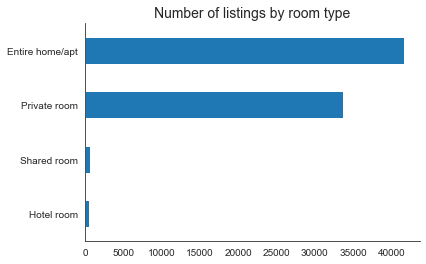

In [19]:
listings_df['room_type'].value_counts(dropna=False).sort_values().plot.barh()
sns.despine()
plt.title('Number of listings by room type', fontsize=14);

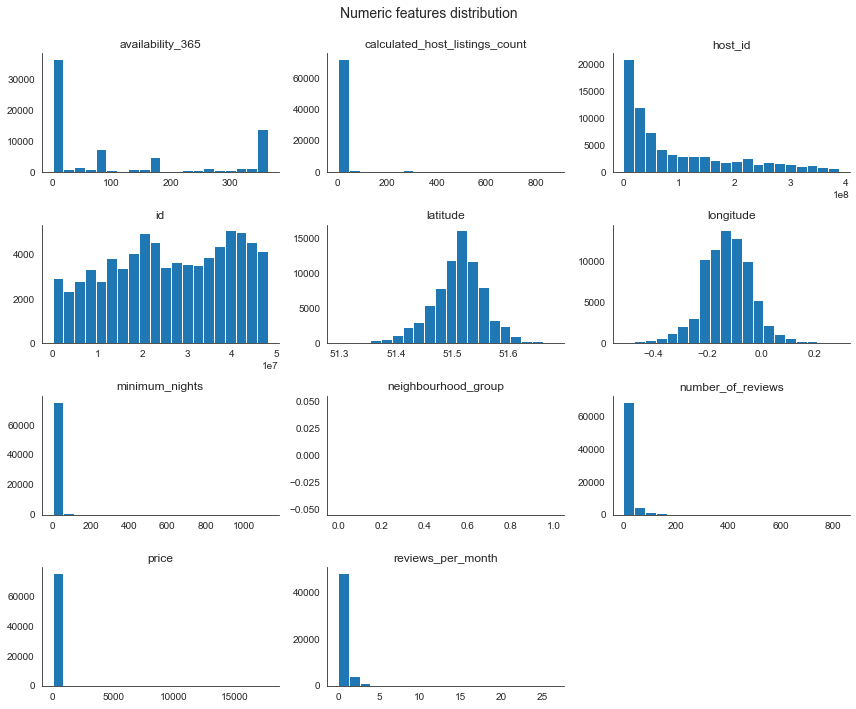

In [20]:
listings_df.hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [21]:
listings_detail_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20191105115249,2019-11-06,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,38151,https://www.airbnb.com/rooms/38151,20191105115249,2019-11-06,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
2,13913,https://www.airbnb.com/rooms/13913,20191105115249,2019-11-06,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,2,1,1,0,0.17
3,38407,https://www.airbnb.com/rooms/38407,20191105115249,2019-11-06,Canary Wharf Immaculate Apt for 2,"The bright, light and stylish apartment in Can...","An entire bright, light and stylish apartment....","The bright, light and stylish apartment in Can...",none,Very easy to get to all the main sites. The tu...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
4,90700,https://www.airbnb.com/rooms/90700,20191105115249,2019-11-06,Sunny Notting Hill flat & terrace,This is a home not a hotel - for the cost gues...,This charming 1 bedroom with en-suite bathroom...,This is a home not a hotel - for the cost gues...,none,A quick guide or a run through about the area ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,3.33


In [22]:
print(listings_detail_df.shape)
listings_detail_df.loc[:, listings_detail_df.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(85068, 106)


medium_url                      85068
xl_picture_url                  85068
neighbourhood_group_cleansed    85068
host_acceptance_rate            85068
thumbnail_url                   85068
jurisdiction_names              85066
license                         84889
square_feet                     84671
monthly_price                   80103
weekly_price                    78112
notes                           52269
access                          39320
house_rules                     35807
host_about                      35751
interaction                     35286
transit                         30748
neighborhood_overview           30374
security_deposit                29125
host_response_rate              25900
host_response_time              25900
space                           25850
review_scores_checkin           21723
review_scores_value             21722
review_scores_location          21721
review_scores_accuracy          21675
review_scores_communication     21667
review_score

In [23]:
listings_detail_df.loc[:, listings_detail_df.nunique() <= 1].nunique().sort_values()


thumbnail_url                   0
medium_url                      0
xl_picture_url                  0
host_acceptance_rate            0
neighbourhood_group_cleansed    0
scrape_id                       1
has_availability                1
jurisdiction_names              1
is_business_travel_ready        1
dtype: int64

In [24]:
listings_detail_df.filter(regex='review_scores').notnull().sum(axis=1).value_counts(normalize=True)

7    0.744310
0    0.254103
4    0.000470
3    0.000400
6    0.000270
1    0.000259
2    0.000141
5    0.000047
dtype: float64

In [25]:
listings_detail_df.describe(include='datetime')

,last_scraped,host_since,calendar_last_scraped,first_review,last_review
count,85068,85056,85068,65062,65062
unique,2,3459,2,2802,1818
top,2019-11-06 00:00:00,2015-05-21 00:00:00,2019-11-06 00:00:00,2019-01-01 00:00:00,2019-11-03 00:00:00
freq,59108,1034,59108,205,1688
first,2019-11-05 00:00:00,2008-09-03 00:00:00,2019-11-05 00:00:00,2009-12-21 00:00:00,2011-07-02 00:00:00
last,2019-11-06 00:00:00,2019-11-04 00:00:00,2019-11-06 00:00:00,2019-11-06 00:00:00,2019-11-06 00:00:00


In [26]:
listings_detail_df.describe(include='object').T

,count,unique,top,freq
listing_url,85068,85068,https://www.airbnb.com/rooms/27780646,1
name,85043,82446,Double room,37
summary,80736,74249,"Featured in The New York Times, The Wall Stree...",214
space,59218,53964,Duchy House is a 19th century building and has...,30
description,82683,78831,Lovely studios situated in an excellent centra...,26
experiences_offered,85068,5,none,83388
neighborhood_overview,54694,44382,Conveniently located in Maida Vale one of Lond...,66
notes,32799,25384,"No smoking, pets or parties!",151
transit,54320,45959,Transport links are excellent with convenient ...,93
access,45748,33418,Guests will have access to the entire property...,1583


In [27]:
print(listings_detail_df['country_code'].value_counts())
listings_detail_df.query('country_code != "GB"')

GB    85065
FR        2
ES        1
Name: country_code, dtype: int64


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
41783,23325697,https://www.airbnb.com/rooms/23325697,20191105115249,2019-11-06,Can torres,M7 minutes to Ibiza Town,NaN,M7 minutes to Ibiza Town,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
57006,30320965,https://www.airbnb.com/rooms/30320965,20191105115249,2019-11-05,"Chambre idéal pour couple, 10min à pied de Camden",Chambre lumineuse très bien situé à 7min à pie...,L’appartement est calme et très bien situé pou...,Chambre lumineuse très bien situé à 7min à pie...,none,Vous trouverez une station de métro (Kentish T...,...,f,f,flexible,f,f,1,0,1,0,0.1
61178,32394504,https://www.airbnb.com/rooms/32394504,20191105115249,2019-11-06,"Cosy one bedroom , near station Edgware",NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,2,1,1,0,NaN


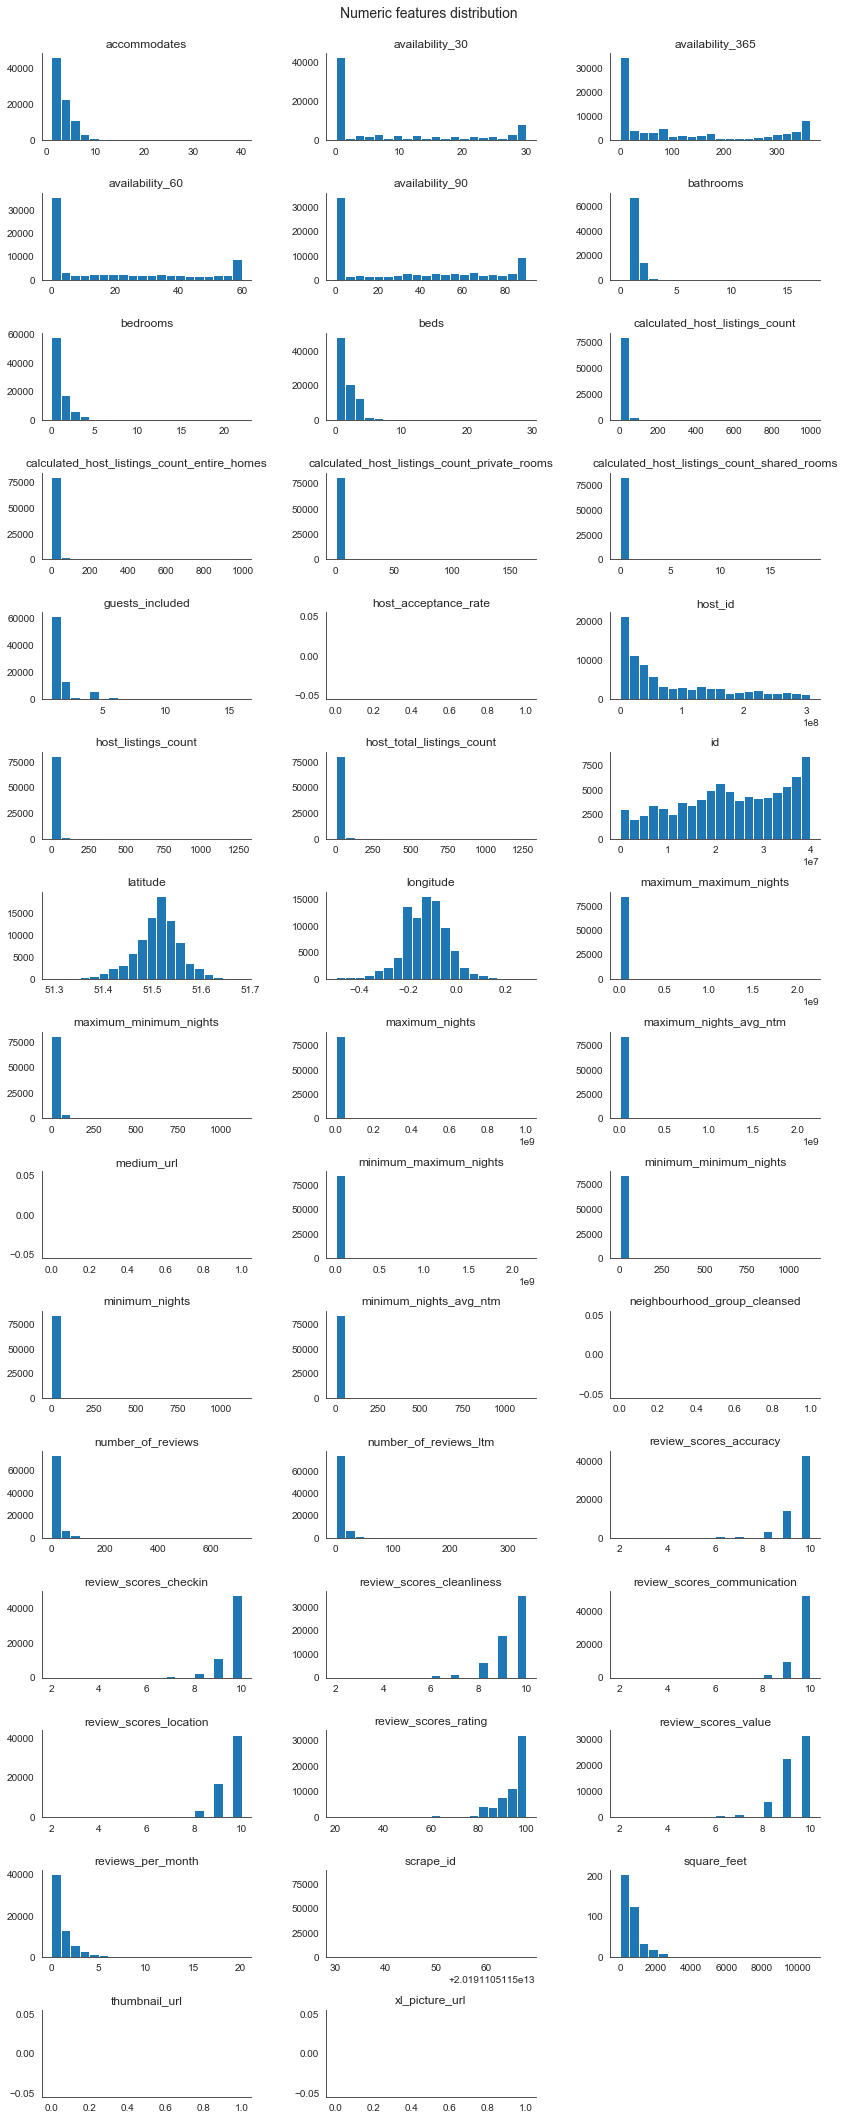

In [28]:
listings_detail_df.hist(figsize=(12, 30), bins=20, grid=False, layout=(15, 3))
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])

In [29]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,100326,2021-02-13,f,$33.00,$33.00,2.0,10.0
1,13913,2021-02-12,t,$40.00,$40.00,1.0,29.0
2,13913,2021-02-13,t,$40.00,$40.00,1.0,29.0
3,13913,2021-02-14,t,$40.00,$40.00,1.0,29.0
4,13913,2021-02-15,t,$40.00,$40.00,1.0,29.0


In [30]:
print(calendar_df.shape)
calendar_df.loc[:, calendar_df.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(27935194, 7)


maximum_nights    2432
minimum_nights    2432
adjusted_price     513
price              513
dtype: int64

In [31]:
calendar_df.describe(include='datetime')

,date
count,27935194
unique,377
top,2022-02-05 00:00:00
freq,76531
first,2021-02-09 00:00:00
last,2022-02-20 00:00:00


In [32]:
calendar_df.describe(include='object')

,available,price,adjusted_price
count,27935194,27934681,27934681
unique,2,2870,2865
top,f,$50.00,$50.00
freq,18399860,1024420,1017011


In [33]:
reviews_df.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


In [34]:
print(reviews_df.shape)
reviews_df.loc[:, reviews_df.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(1163886, 2)


Series([], dtype: float64)

In [35]:
reviews_df.describe(include='datetime')

,date
count,1163886
unique,3718
top,2019-07-07 00:00:00
freq,2434
first,2009-12-21 00:00:00
last,2021-02-13 00:00:00


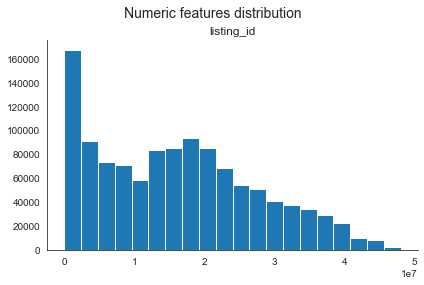

In [36]:
reviews_df.hist(bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [37]:
reviews_detail_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [38]:
print(reviews_detail_df.shape)
reviews_detail_df.loc[:, reviews_detail_df.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(1163886, 6)


comments         512
reviewer_name      1
dtype: int64

In [39]:
reviews_detail_df.describe(include='datetime')

,date
count,1163886
unique,3718
top,2019-07-07 00:00:00
freq,2434
first,2009-12-21 00:00:00
last,2021-02-13 00:00:00


In [40]:
reviews_detail_df.describe(include='object')

,reviewer_name,comments
count,1163885,1163374
unique,120501,1116543
top,David,The host canceled this reservation 2 days befo...
freq,9965,1328


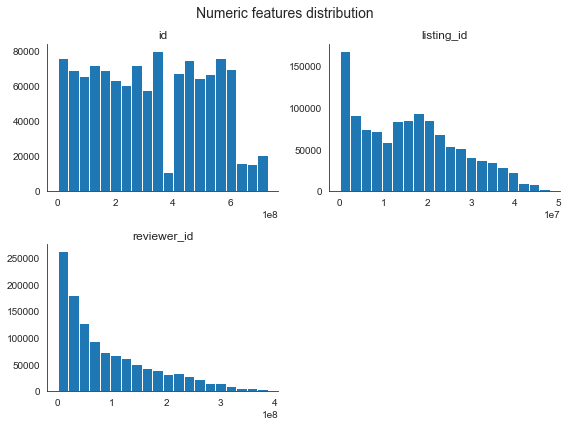

In [41]:
reviews_detail_df.hist(figsize=(8, 6), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [42]:
neighbourhoods_df.head(1)

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham


In [43]:
print(neighbourhoods_df.shape)
neighbourhoods_df.loc[:, neighbourhoods_df.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(33, 2)


neighbourhood_group    33
dtype: int64

In [44]:
neighbourhoods_df.describe(include='object')

,neighbourhood
count,33
unique,33
top,Hillingdon
freq,1


In [45]:
gdf.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [46]:
print(gdf.shape)
gdf.loc[:, gdf.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(33, 3)


neighbourhood_group    33
dtype: int64

In [47]:
gdf.describe(include='object')

,neighbourhood,neighbourhood_group
count,33,0
unique,33,0
top,Hillingdon,NaN
freq,1,NaN


In [48]:
review_cols = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 'review_scores_value']
host_cols = ['host_since', 'host_response_time',
             'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']

listing_detail_cols = ['id', 'instant_bookable', 'neighbourhood_cleansed', 'room_type'] + review_cols + host_cols 


res_listings_detail_df = listings_detail_df.query('country_code == "GB"')
res_listings_detail_df = res_listings_detail_df[res_listings_detail_df['host_name'].notnull()]
res_listings_detail_df = res_listings_detail_df[res_listings_detail_df.filter(regex='review_scores').notnull().all(axis=1)]
res_listings_detail_df = res_listings_detail_df[listing_detail_cols].rename({'neighbourhood_cleansed': 'neighbourhood'}, axis=1)
res_listings_detail_df.head()

,id,instant_bookable,neighbourhood,room_type,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified
0,11551,t,Lambeth,Entire home/apt,9.0,9.0,10.0,10.0,9.0,9.0,2009-10-03,within an hour,t,t,t
2,13913,f,Islington,Private room,10.0,10.0,10.0,10.0,9.0,9.0,2009-11-16,within a few hours,f,t,f
3,38407,t,Tower Hamlets,Entire home/apt,9.0,10.0,10.0,10.0,9.0,9.0,2010-07-12,a few days or more,f,t,f
4,90700,t,Kensington and Chelsea,Entire home/apt,9.0,9.0,10.0,10.0,10.0,9.0,2011-04-07,within a day,f,t,f
5,15400,t,Kensington and Chelsea,Entire home/apt,10.0,10.0,10.0,10.0,10.0,9.0,2009-12-05,NaN,f,t,t


In [49]:
res_listings_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63313 entries, 0 to 85052
Data columns (total 15 columns):
id                             63313 non-null int64
instant_bookable               63313 non-null object
neighbourhood                  63313 non-null object
room_type                      63313 non-null object
review_scores_accuracy         63313 non-null float64
review_scores_cleanliness      63313 non-null float64
review_scores_checkin          63313 non-null float64
review_scores_communication    63313 non-null float64
review_scores_location         63313 non-null float64
review_scores_value            63313 non-null float64
host_since                     63313 non-null datetime64[ns]
host_response_time             47964 non-null object
host_is_superhost              63313 non-null object
host_has_profile_pic           63313 non-null object
host_identity_verified         63313 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(7)
memory usage: 7.7+ MB


In [50]:
geo_cols = ['neighbourhood', 'geometry']
res_gdf = gdf.loc[:, geo_cols]
res_gdf.head()

,neighbourhood,geometry
0,Kingston upon Thames,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [51]:
binary_cols = ['instant_bookable', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
binary_map = {'f': False, 't': True}
res_listings_detail_df[binary_cols] = res_listings_detail_df[binary_cols].apply(lambda x: x.map(binary_map)).astype(bool)

cat_type = pd.api.types.CategoricalDtype(['not specified', 'within an hour', 'within a few hours', 'within a day', 'a few days or more'])
res_listings_detail_df['host_response_time'] = res_listings_detail_df['host_response_time'].fillna('not specified').astype(cat_type)

In [52]:
res_listings_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63313 entries, 0 to 85052
Data columns (total 15 columns):
id                             63313 non-null int64
instant_bookable               63313 non-null bool
neighbourhood                  63313 non-null object
room_type                      63313 non-null object
review_scores_accuracy         63313 non-null float64
review_scores_cleanliness      63313 non-null float64
review_scores_checkin          63313 non-null float64
review_scores_communication    63313 non-null float64
review_scores_location         63313 non-null float64
review_scores_value            63313 non-null float64
host_since                     63313 non-null datetime64[ns]
host_response_time             63313 non-null category
host_is_superhost              63313 non-null bool
host_has_profile_pic           63313 non-null bool
host_identity_verified         63313 non-null bool
dtypes: bool(4), category(1), datetime64[ns](1), float64(6), int64(1), object(2)
memory u

In [ ]:
res_gdf['area_sq_km'] = (res_gdf['geometry'].to_crs({'init': 'epsg:3395'})
                                    .map(lambda p: p.area / 10**6))

res_listings_detail_df['age'] = (pd.Timestamp('now') - pd.to_datetime(res_listings_detail_df['host_since'])).dt.days.div(365.25).round(2)

In [ ]:
geo_listings_df = res_gdf.merge(res_listings_detail_df, how='inner', on='neighbourhood')

geo_listings_df['listings_count'] = geo_listings_df.groupby('neighbourhood')['id'].transform('count')
geo_listings_df['listings_density'] = geo_listings_df.groupby('neighbourhood')['area_sq_km'].transform(lambda x: len(x) / x)

geo_listings_df['mean_review_scores_accuracy'] = geo_listings_df.groupby('neighbourhood')['review_scores_accuracy'].transform('mean')
geo_listings_df['mean_review_scores_cleanliness'] = geo_listings_df.groupby('neighbourhood')['review_scores_cleanliness'].transform('mean')
geo_listings_df['mean_review_scores_checkin'] = geo_listings_df.groupby('neighbourhood')['review_scores_checkin'].transform('mean')
geo_listings_df['mean_review_scores_communication'] = geo_listings_df.groupby('neighbourhood')['review_scores_communication'].transform('mean')
geo_listings_df['mean_review_scores_location'] = geo_listings_df.groupby('neighbourhood')['review_scores_location'].transform('mean')
geo_listings_df['mean_review_scores_value'] = geo_listings_df.groupby('neighbourhood')['review_scores_value'].transform('mean')

geo_listings_df['mean_review_scores_all'] = geo_listings_df.filter(like='mean_review_scores').mean(axis=1)

In [ ]:
geo_listings_df.info()

In [ ]:
review_cols = ['mean_review_scores_accuracy', 'mean_review_scores_cleanliness', 'mean_review_scores_checkin',
               'mean_review_scores_communication', 'mean_review_scores_location', 'mean_review_scores_value']
review_titles = ['Accuracy', 'Cleanliness', 'Check-in',
                 'Communication', 'Location', 'Value']
review_map = {col: title for col, title in zip(review_cols, review_titles)}

result_df = geo_listings_df[['geometry', 'neighbourhood', 'mean_review_scores_all'] + review_cols].drop_duplicates()

def gen_map_chart(df, review_col, review_title):
    '''Generate choropleth map
    
    Generate choropleth map based on scores of specific review types
    
    :param df: DataFrame with necessary geo data and review scores for different neighbourhood
    :type df: DataFrame
    :param review_col: name of review scores type
    :type review_col: str
    :param review_title: title of review scores type
    :type review_title: str
    :return: Altair Chart for displaying 
    :rtype: Chart
    '''
    chart = alt.Chart(
        df,
        title=review_title
    ).mark_geoshape().encode(
        color=f'{review_col}:Q',
        tooltip=['neighbourhood:N', f'{review_col}:Q']
    ).properties(
        width=250, 
        height=250
    )
    
    return chart

charts = []

for review_col, review_title in zip(review_cols, review_titles):
    charts.append(gen_map_chart(result_df, review_col, review_title))

overall_map_chart = gen_map_chart(result_df, 'mean_review_scores_all', 'Overall')

((alt.vconcat(alt.concat(*charts, columns=3), overall_map_chart, 
              title='Average review scores by neighbourhood', 
              center=True)
     .configure_view(strokeWidth=0)
     .configure_title(fontSize=18)
     .configure_legend(title=None, orient='top',  labelFontSize=12)))

In [ ]:
result_df = (geo_listings_df[review_cols].rename(review_map, axis=1)
                                         .corr()
                                         .reset_index()
                                         .melt(id_vars='index')
                                         .rename({'value': 'correlation'}, axis=1))

base = alt.Chart(
    result_df,
    title='Average Review Scores Relationship'
).properties(
    width=600, 
    height=600
)

heatmap = base.mark_rect().encode(
    x=alt.X('index:N', title=None),
    y=alt.Y('variable:N', title=None),
    color='correlation:Q'
)

text = base.mark_text(baseline='middle').encode(
    x=alt.X('index:N', title=None),
    y=alt.Y('variable:N', title=None),
    text=alt.Text('correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.correlation < 0,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).configure_axis(
    labelAngle=0,
    labelFontSize=14
).configure_legend(
    orient='top',
    titleFontSize=14,    
).configure_title(
    fontSize=18,
    offset=15,
    anchor='start',
    frame='group'
)

In [ ]:
def gen_parallel_chart(df, class_col, class_title):
    '''Generate parallel coordinates chart
    
    Generate parallel coordinates chart based on specific class column by different review score types
    
    :param df: DataFrame with necessary data for class column calculation
    :type df: DataFrame
    :param class_col: name of class column 
    :type class_col: str
    :param class_title: title of review scores type
    :type class_title: str
    :return: Altair Chart for displaying 
    :rtype: Chart
    '''
    result_df = (df.groupby(class_col)[review_cols]
                   .mean()
                   .reset_index()
                   .melt(id_vars=class_col))
    result_df['variable'] = result_df['variable'].map(review_map)

    chart = alt.Chart(
        result_df,
        title = f'{class_title}'
    ).mark_line().encode(
        x=alt.X('variable:N',
                title=None),
        y=alt.Y('value:Q',
                scale=alt.Scale(zero=False),
                axis=None),
        color=f'{class_col}:N'
    ).properties(
        width=750, 
        height=300
    )
    
    return chart

class_cols = ['room_type', 'instant_bookable', 'host_is_superhost']
class_titles = ['Room Type', 'Listing is Instant Bookable', 'Host is Superhost']

charts = []

for class_col, class_title in zip(class_cols, class_titles):
    charts.append(gen_parallel_chart(geo_listings_df, class_col, class_title))
    
(alt.concat(*charts, columns=1, title='Average Review Scores by Host/Listing Properties')
    .configure_view(strokeWidth=0)
    .configure_legend(
        title=None, 
        orient='top', 
        columns=0,
        labelFontSize=14)
    .configure_axis(
        labelAngle=0,
        grid=False,
        labelFontSize=14)
    .configure_title(
        anchor='start',
        fontSize=18,
        offset=15)
    .resolve_scale(color='independent')
)

In [53]:
import re

def clean_text(string_in):
    string_in = re.sub("[^a-zA-Z]", " ", str(string_in))  # Replace all non-letters with spaces
    string_in = string_in.lower()                         # Tranform to lower case    
    
    return string_in.strip()

reviews_detail_df["comments_cleaned"] = reviews_detail_df.comments.apply(clean_text)

In [54]:
from nltk.tokenize import RegexpTokenizer
preprocessed = [" ".join(RegexpTokenizer(r'\w+').tokenize(reviews_detail_df.comments_cleaned[idx])) for idx in reviews_detail_df.index]

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Created document-term matrix of size %d x %d" % (tfidf.shape[0],tfidf.shape[1]))

Created document-term matrix of size 1163886 x 180948


In [56]:
from sklearn import decomposition
import numpy as np
nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated W(document-topic)) matrix of size %s and H (topic-word) matrix of size %s" % ( str(W.shape), str(H.shape)))

feature_names = vectorizer.get_feature_names()
n_top_words = 10

# Print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated W(document-topic)) matrix of size (1163886, 5) and H (topic-word) matrix of size (5, 180948)
Topic #0:
stay london clean lovely flat room comfortable apartment recommend perfect

Topic #1:
canceled automated posting reservation arrival days host day friendly helpful

Topic #2:
great location place host stay value communication apartment hosts space

Topic #3:
good location value money communication clean room price host experience

Topic #4:
nice place stay really clean host recommend people cozy room



In [57]:
mydf = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic

mylist = list(mydf.itertuples())

reviews_topic1 = []
reviews_topic2 = []
reviews_topic3 = []
reviews_topic4 = []
reviews_topic5 = []

for order_id, key, num1, num2, num3, num4, num5 in mylist:
    reviews_topic1.append((key, num1))
    reviews_topic2.append((key, num2))
    reviews_topic3.append((key, num3))
    reviews_topic4.append((key, num4))
    reviews_topic5.append((key, num5))

reviews_topic1 = sorted(reviews_topic1, key=lambda myword: myword[1], reverse=True)
reviews_topic2 = sorted(reviews_topic2, key=lambda myword: myword[1], reverse=True)
reviews_topic3 = sorted(reviews_topic3, key=lambda myword: myword[1], reverse=True)
reviews_topic4 = sorted(reviews_topic4, key=lambda myword: myword[1], reverse=True)
reviews_topic5 = sorted(reviews_topic5, key=lambda myword: myword[1], reverse=True)

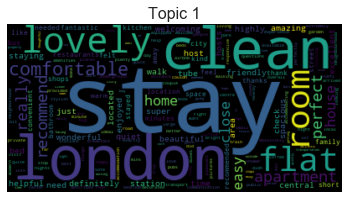

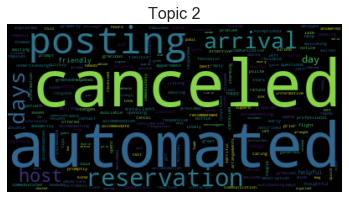

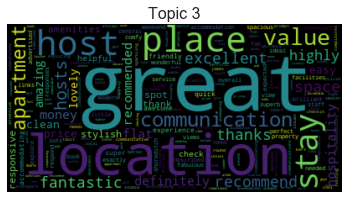

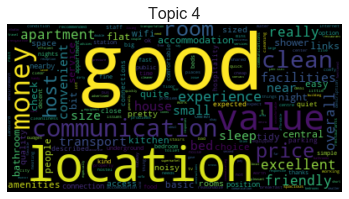

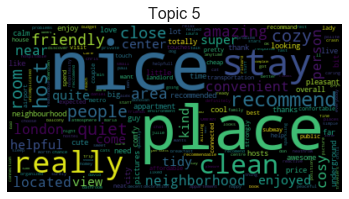

In [58]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=1000)    
    wordcloud = WordCloud().generate_from_frequencies(dict)
    
    plt.title('Topic %s' %str(topic_number), size = 16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

draw_wordcloud(dict(reviews_topic1), topic_number=1)
draw_wordcloud(dict(reviews_topic2), topic_number=2)
draw_wordcloud(dict(reviews_topic3), topic_number=3)
draw_wordcloud(dict(reviews_topic4), topic_number=4)
draw_wordcloud(dict(reviews_topic5), topic_number=5)

In [59]:
text_new = preprocessed[0:5]
tfidf_new = vectorizer.transform(text_new)
DT_new = nmf.transform(tfidf_new)